In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
dataset=pd.read_csv(r"C:\Users\rasgu\OneDrive\Documents\VS Code\ml\datasets\Housing.csv")
dataset.head(3)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,price
0,2,1.00,1180,5650,1.0,0,0,3,1180,0,1955,0,231300.0
1,3,2.25,2570,7242,2.0,0,0,3,2170,400,1951,1991,538000.0
2,2,1.00,770,10000,1.0,0,0,3,770,0,1933,0,180000.0


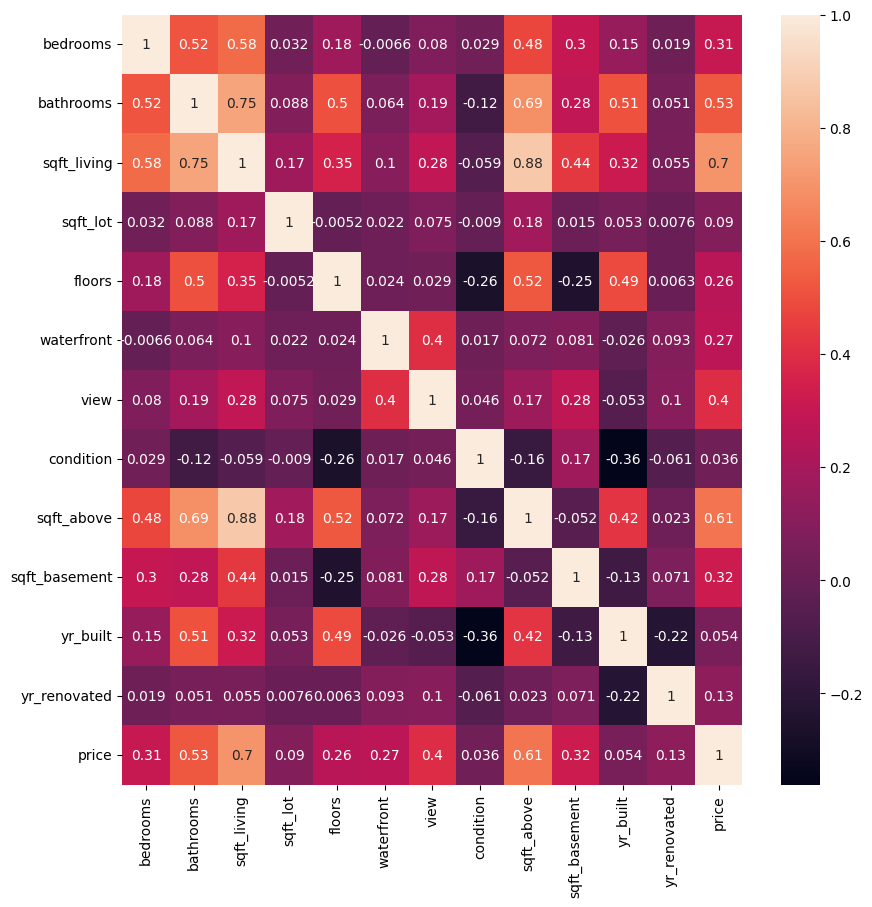

In [3]:
#for linear regression-check if co-related
#co-relation matrix:
plt.figure(figsize=(10,10))
sns.heatmap(data=dataset.corr(),annot=True)
plt.show()

In [4]:
#seperarting dependent and independent data
x=dataset.iloc[:,:-1]
y=dataset["price"]

In [5]:
#scaling data
sc=StandardScaler()
sc.fit(x)
x=pd.DataFrame(sc.transform(x), columns=x.columns) #storing into original
#if dont want to store in original then just sc.transform(x)

In [6]:
#train test split
x_train, x_test, y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42)

In [7]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [8]:
#linear model
lr=LinearRegression()
lr.fit(x_train, y_train)
lr.score(x_test, y_test)*100

59.88156528755446

In [9]:
lr.coef_

array([-51447.92663755,  50512.03472499, 128882.64411034, -15241.31348671,
        24791.38273665,  43721.67581271,  47888.5135559 ,  10965.79756991,
       117953.19311666,  46760.69427712, -85575.26022632,   4748.03588431])

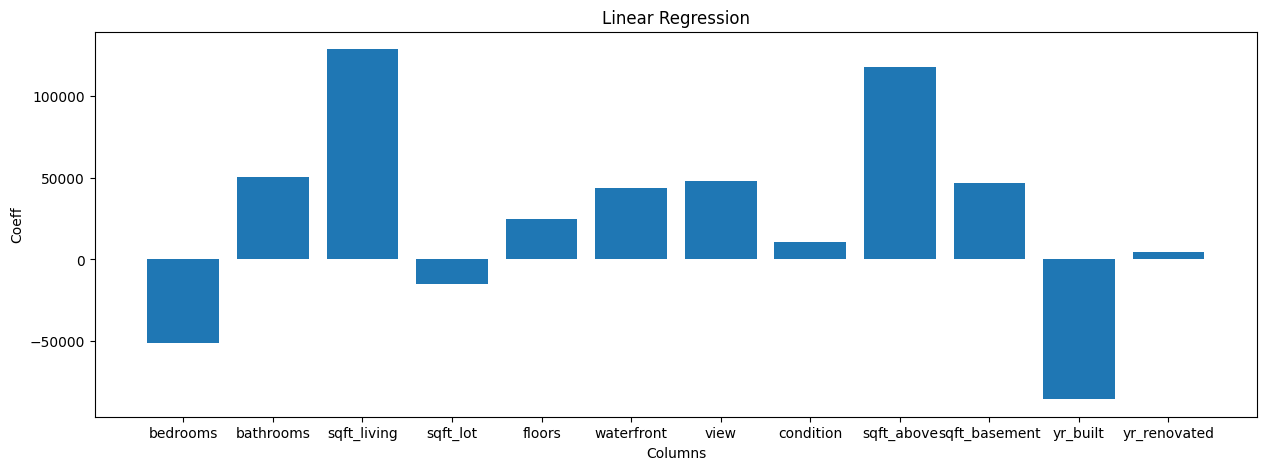

In [10]:
plt.figure(figsize=(15,5))
plt.bar(x.columns, lr.coef_)
plt.title("Linear Regression")
plt.xlabel("Columns")
plt.ylabel("Coeff")
plt.show()

In [11]:
#lasso
la=Lasso(alpha=0.001)#try changing alpha values to 0.5, 10 etc
la.fit(x_train,y_train)
la.score(x_test,y_test)*100

c:\Users\rasgu\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.547e+13, tolerance: 2.262e+11
  model = cd_fast.enet_coordinate_descent(


59.881565309785415

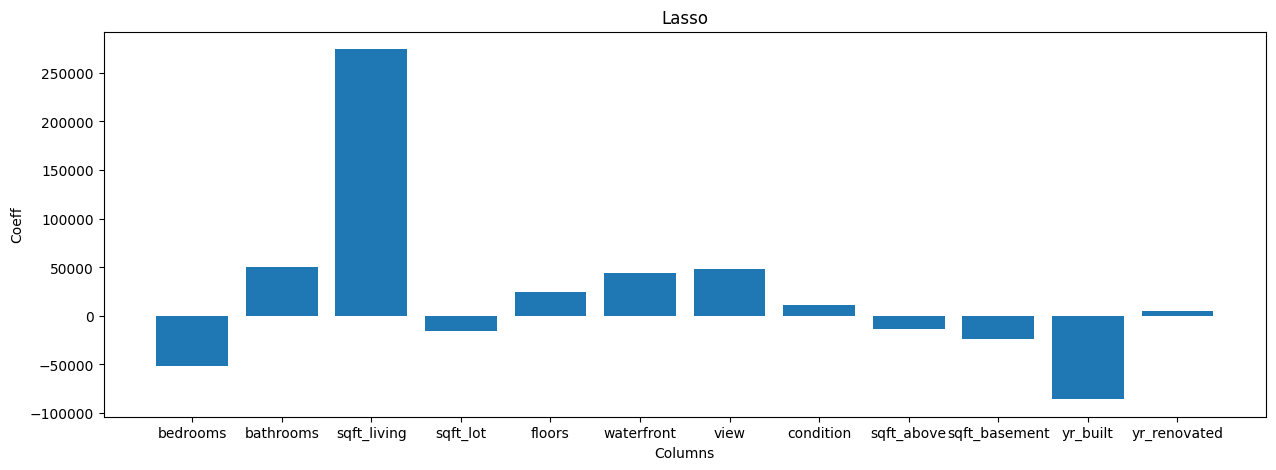

In [12]:
plt.figure(figsize=(15,5))
plt.bar(x.columns, la.coef_)
plt.title("Lasso")
plt.xlabel("Columns")
plt.ylabel("Coeff")
plt.show()

In [13]:
#ridge
ri=Ridge(alpha=10) #reduce coeff-reduce overfitting
ri.fit(x_train, y_train)
ri.score(x_test,y_test)*100

59.88114511594993

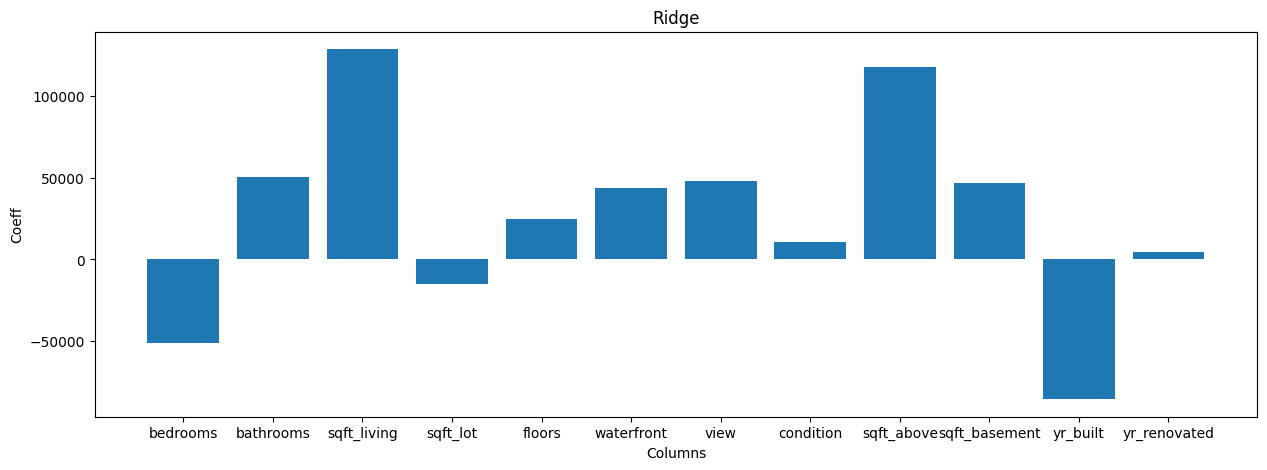

In [14]:
plt.figure(figsize=(15,5))
plt.bar(x.columns, ri.coef_)
plt.title("Ridge")
plt.xlabel("Columns")
plt.ylabel("Coeff")
plt.show()

In [15]:
#finding error in all 3 methods
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [16]:
print(mean_squared_error(y_test, lr.predict(x_test)))
print(mean_absolute_error(y_test, lr.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test, lr.predict(x_test))))

60721137799.81036
158388.17637459966
246416.5940025354


In [17]:
print(mean_squared_error(y_test, la.predict(x_test)))
print(mean_absolute_error(y_test, la.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test, la.predict(x_test))))

60721137766.16279
158388.17643057337
246416.59393426165


In [18]:
print(mean_squared_error(y_test, ri.predict(x_test)))
print(mean_absolute_error(y_test, ri.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test, ri.predict(x_test))))

60721773749.295456
158375.61700303716
246417.88439416376


In [19]:
#choose one which has more accuracy
#comparing coeffs:

df=pd.DataFrame({"col_name":x.columns,"Linear":lr.coef_,"Lasso":la.coef_,"Ridge":ri.coef_})
df

,col_name,Linear,Lasso,Ridge
0,bedrooms,-51447.926638,-51447.925388,-51329.982304
1,bathrooms,50512.034725,50512.028187,50493.394868
2,sqft_living,128882.644110,274436.975478,128793.063618
3,sqft_lot,-15241.313487,-15241.312173,-15206.797444
4,floors,24791.382737,24791.383340,24782.247615
5,waterfront,43721.675813,43721.675163,43706.130485
6,view,47888.513556,47888.513171,47907.005781
7,condition,10965.797570,10965.796485,10980.795427
8,sqft_above,117953.193117,-13282.497432,117864.605115
9,sqft_basement,46760.694277,-23378.507277,46740.549756
